# Dimension Reduction

Nowadays, a lot of attributes are recorded for an individual. In order to fit a simple model, some sort of dimension reduction seems necessary. Mathematically dimension reduction is projection of data into a lower dimensional space. There are various reasons why dimension reduction is an interesting technique. For example :

- Can be used for data visualization in high-dimensions.
- The reduced dimensions can be used as new attributes for a better prediction.



## 1-Visualization

### Zip Code dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = 'data/'
#filename = path + 'ziptrain.csv'
zipdata = np.loadtxt("data/ziptrain.csv")

In [4]:
zipdata.shape

(7291, 257)

The first column is the digit, the remaining 256 are pixes of a 16X16 grayscale image. Let's visualize the first row (image).

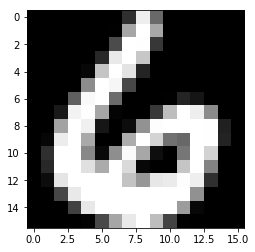

In [5]:
plt.imshow(zipdata[0, 1:].reshape(16,16), "gray")

By taking the opposite values, we get the opposite gray scale representation.

In [ ]:
plt.imshow(-zipdata[0, 1:].reshape(16,16), "gray")

Check if the associated label is a 6.

In [ ]:
zipdata[0,0] == 6

We can check the second image also..

In [ ]:
plt.imshow(-zipdata[1, 1:].reshape(16,16), "gray")

In [ ]:
zipdata[1,0]

... and it is a 5.

It is important that you feel comfortable with numpy arrays: concatenating, deleting, reshaping, etc. Here I provide you some examples. Let's select images that only contain value 3, and visualize a random sample of such images.

In [ ]:
zipdata3 = zipdata[zipdata[:, 0] == 3]
zipdata3.shape

Only 658 samples are 3. Let's visualize a random sample of them of size 20.

In [ ]:
np.random.seed(1)
random3 = np.random.choice(range(len(zipdata3)), size=20, replace = False)

print(random3)
#gives you the index of the selected random images

In [ ]:
zipdata3stack = zipdata3[random3[0], 1:].reshape(16, 16)
print(zipdata3stack)
plt.imshow(-zipdata3stack,"gray");
plt.axis("off");

In [ ]:
for i in range(1,len(random3)):
    zipdata3stack = np.hstack((zipdata3stack, zipdata3[random3[i],1:].reshape(16, 16)))

plt.imshow(-zipdata3stack,"gray");
plt.axis("off");

In [ ]:
# You may want to plot vertically
# This is a more clever coding, we do not need  "for" loop
plt.imshow(-zipdata3[random3,1:].reshape(320,16),"gray");
plt.axis("off");

### Subset of the dataset: digits 3 and 8

Let's create a classification problem. The goal is to classify 3 and 8 images.

In [ ]:
zipdata8 = zipdata[zipdata[:, 0] == 8]
zipdata8.shape

In [ ]:
zipdata38 = np.vstack([zipdata3, zipdata8])
zipdata38.shape

### Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

# remove the first column (image label)
pca.fit(zipdata38[:, 1:])

In [ ]:
Z = pca.transform(zipdata38[:,1:])

In [ ]:
plt.scatter(Z[:,0], Z[:,1], c= zipdata38[:,0], alpha=0.3);

In [ ]:
#This representation is much more clear than what we can do with the original 256 pixels (covariates)
#plt.scatter(zipdata38[:,100], zipdata38[:,200], c= zipdata38[:,0], alpha=0.3);

We can make it a little bit more visual with the following lines of code.

In [ ]:
plt.scatter(Z[zipdata38[:,0]==3,0], Z[zipdata38[:,0]==3,1], marker='$3$', 
            color='blue', alpha = 0.3);

plt.scatter(Z[zipdata38[:,0]==8,0], Z[zipdata38[:,0]==8,1], marker='$8$', 
            color='red', alpha = 0.3);

plt.xlim([-10,10])
plt.ylim([-10,10])

### Binary Classification on PC1 and PC2

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
predictors = Z
outcome = (zipdata38[:,0] > 4)*1
lr.fit(predictors, outcome)

In [ ]:
print(lr.intercept_, lr.coef_)

In [ ]:
plt.scatter(Z[zipdata38[:,0]==3,0], Z[zipdata38[:,0]==3,1], marker='$3$', 
            color='blue', alpha = 0.3);

plt.scatter(Z[zipdata38[:,0]==8,0], Z[zipdata38[:,0]==8,1], marker='$8$', 
            color='red', alpha = 0.3);

pred = np.linspace(start = -10, stop = 10, num= 100)
plt.plot(pred, -(lr.coef_[0]/lr.coef_[1]) * pred, "-k")

plt.xlim([-10,10])
plt.ylim([-10,10])

### Auto dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path='data/'
filename = path+'Auto.csv'
auto = pd.read_csv(filename, na_values=['?'], na_filter=True)
auto = auto.dropna()

In [ ]:
auto.head()

In [ ]:
# only quantitative variables
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto['mpg']

First, fit a PCA on original values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.values)
Z = pca.transform(X)

In [ ]:
plt.scatter(Z[:,0], Z[:,1]);

Then, work with standardized values

In [ ]:
from sklearn.preprocessing import scale
X_std = scale(X.values)
pca_std = PCA(n_components=2)
pca_std.fit(X_std)
Z_std = pca_std.transform(X_std)

In [ ]:
plt.scatter(Z_std[:,0], Z_std[:,1]);

Now Z includes a summary of all variables in X only in two dimensions. Further more, principal components of the data matrix and the standardized data matrix are different.

## 2-Principal Component Regression
We may use principal components as attributes to feed a linear regression. Often it provides a better prediction in low dimensions.


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_simple = X[['horsepower']]
lr.fit(X_simple,y)

In [ ]:
lr.score(X_simple, y)

In [ ]:
pcr = LinearRegression()
Z_simple = Z[:,0].reshape(-1,1)
pcr.fit(Z_simple, y)

In [ ]:
pcr.score(Z_simple,y)

So, the R squared increased when using the first principal component instead of horsepower variable for fitting a simple linear regression.

### Cross-Validation

The PCA we defined in the above code was arbitrarely a projection onto a space of dimension 2. In practice, we will choose the best projection dimension $M$ with cross-validation.

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))
X.shape

In [ ]:
X_reduced.shape

In [ ]:
pd.DataFrame(X_reduced).head()

In [ ]:
from sklearn import model_selection

In [ ]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True)

regr = LinearRegression()
r2 = []

# Calculate MSE with only the intercept (no principal components in regression)
score = model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, \
                                           scoring='r2').mean()    
r2.append(score)

# Calculate MSE using CV for the 5 principle components, adding one component at the time.
for i in np.arange(1, 6):
    score = model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, \
                                               scoring='r2').mean()
    r2.append(score)
    
# Plot results    
plt.plot(r2, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('R Squared')
plt.title('mpg');

We see that the largest cross-validation $R^2$ occurs when  $M=5$  components are used, which amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs. However, from the plot we also see that the cross-validation error is roughly the same when only one component is included in the model. This suggests that a model that uses just a small number of components might suffice.

In [ ]:
#We'll do a little math to get the amount of variance explained by adding each consecutive principal component:

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)

We'll dig deeper into this concept later, but for now we can think of this as the amount of information about the predictors or the response that is captured using  $M$ principal components. For example, setting  $M=1$ captures $81\%$ of all the variance, or information, in the predictors. In contrast, using  $M=2$  increases the value to $95\%$. If we were to use all  $M=p=5$  components, this would increase to 100%.

### Prediction

Now let's perform PCA on the training data and evaluate its test set performance.

In [ ]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

r2 = []

# Calculate R2 with only the intercept (no principal components in regression)
score = model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, \
                                           scoring='r2').mean()    
r2.append(score)

# Calculate R2 using CV for the 5 principal components, adding one component at the time.
for i in np.arange(1, 6):
    score = model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, \
                                             scoring='r2').mean()
    r2.append(score)

    
plt.plot(np.array(r2), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('R Squared')
plt.title('mpg');

We find that the highest cross-validation $R^2$ occurs when  $M=3$ components are used. Now we'll see how it performs on the test data and compute the test $R^2$.

In [ ]:
M=3
X_reduced_test = pca2.transform(scale(X_test))[:,:M]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:M], y_train)

# R squared on test data
print("R Squared:", regr.score(X_reduced_test, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error
pred = regr.predict(X_reduced_test)
print("MSE:", mean_squared_error(y_test, pred))

### Comparison with Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Fit a Ridge regression with arbitrary regularization constant, take 0.005 for example
rr = Ridge(alpha=0.005, normalize=True)
rr.fit(X_train, y_train) 

# Predict on the test set and compute MSE
rr_pred = rr.predict(X_test)
print("R Squared:", rr.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, rr_pred))

The test set MSE for PCR is competitive with the results obtained using ridge regression. However, as a result of the way PCR is implemented, the final model is more difficult to interpret because it does not perform any kind of variable selection or even directly produce coefficient estimates.

## 3-Partial Least Squares
It makes sense if we want to project X matrix for predicting some y, to make the projection function of y. This can be regarded as the right projection method for linear regression. The PLS projection is a slightly different version of PCA: the algorithm takes account for y while projecting data.



In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=2)
pls.fit(X, y)
W = pls.transform(X)

In [ ]:
plt.scatter(W[:,0], W[:,1]);

In [ ]:
pls.score(X,y)

### Cross-Validation

In [ ]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

r2 = []

for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, \
                                            scoring='r2').mean()
    r2.append(score)

# Plot results
plt.plot(np.arange(1, 6), np.array(r2), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('R Squared')
plt.title('mpg')

In [ ]:
#Let's compute the R Squared and MSE on the test set for Partial Least Squares with M=3 components.

pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

print("R Squared:", pls.score(scale(X_test),y_test))
print("MSE:", mean_squared_error(y_test, pls.predict(scale(X_test))))

### Summary

In [ ]:
print("R Squared for PCR with M=3:", round(regr.score(X_reduced_test, y_test),3))
print("R Squared for PLS with M=3:", round(pls.score(scale(X_test),y_test),3))
print("R Squared for Ridge:", round(rr.score(X_test, y_test),3))